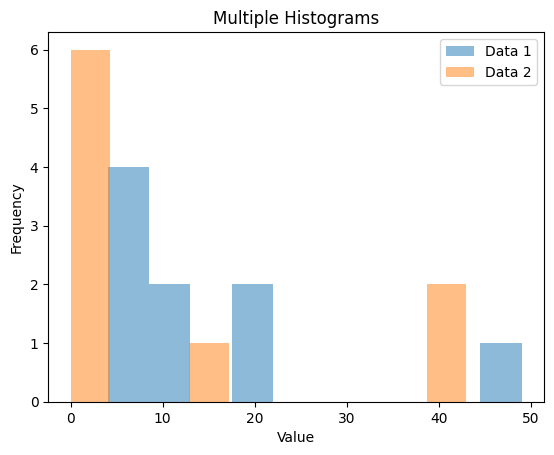

In [1]:
# X1 = [12,5,11,11,9,18]
# X2 = [7,3,4,6,3,13]
import matplotlib.pyplot as plt

TV_FAVORABLE = [12,4,5,20,5,5,20,10,49]
TV_UNFAVORABLE = [43,14,42,1,2,0,1,0,0]

# Create multiple histograms
plt.hist(TV_FAVORABLE, alpha=0.5, label='Data 1')
plt.hist(TV_UNFAVORABLE, alpha=0.5, label='Data 2')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Multiple Histograms')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [1]:
from scipy.stats import f_oneway

# Assuming you have data for each group in a list or array format
group1_data = [1, 2, 3, 4, 5]
group2_data = [2, 3, 4, 5, 6]
group3_data = [3, 4, 5, 6, 7]

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(group1_data, group2_data, group3_data)

print("F-Statistic:", f_statistic)
print("P-value:", p_value)

F-Statistic: 2.0
P-value: 0.177978515625


In [13]:
# Function for SS_terms_prog: Progress Check *16.5
def Anova(sample_data,alpha):
    from scipy.stats import f
    import statistics
    from statsmodels.stats.libqsturng import qsturng
    from scipy.stats import f_oneway

    N = 0
    k = len(sample_data)
    for s in sample_data:
        N += len(s)
        n = len(s)
    print(f'N = {N}\nn = {n}\nk = {k}')
    
    df_between = k-1
    df_within = N-k
    print(f'df_between = {df_between}\ndf_within = {df_within}')

    squares = []
    G_raw = []
    SS_between_raw = []
    for s in sample_data:
        G_raw.append(sum(s))
        SS_between_raw.append((sum(s)**2)/n)

        for item in s:
            squares.append(item**2)
        
    G = sum(G_raw)
    print(f'G = {G}')

    SS_between = round(sum(SS_between_raw) - (G**2/N),3)
    print(f'SS_between = {SS_between}')

    sum_of_squares = sum(squares)

    SS_within = round(sum_of_squares - sum(SS_between_raw),3)
    print(f'SS_within = {SS_within}')

    SS_total = sum_of_squares - (G**2/N)
    print(f'SS_total = {SS_total}')

    accuracy_check = (SS_between + SS_within) == SS_total
    print(f'accuracy_check = {accuracy_check}')

    MS_within = round(SS_within/df_within,3)
    print(f'MS_within = {MS_within}')

    MS_between = round(SS_between/df_between,3)
    print(f'MS_between = {MS_between}')

    SS_total = SS_within + SS_between
    print(f'SS_total = {SS_total}')

    F_critical_value = round(f.ppf(1 - alpha, df_between, df_within),3)
    print(f'F_critical_value = {F_critical_value}')

    F_observed = round(MS_between/MS_within,3)
    print(f'F_observed = {F_observed}')

    proportion_of_explained_variance = round(SS_between/SS_total,3)
    print(f'proportion_of_explained_variance = {proportion_of_explained_variance}')

    q = round(qsturng(1-alpha, k, df_within),3)
    print(f'q = {q}')

    Tukeys_HSD_test = round(q*((MS_within/n)**0.5),3)
    print(f'Tukeys_HSD_test = {Tukeys_HSD_test}')

    means = [round(statistics.mean(data),3) for data in sample_data]
    print(f'means = {means}')

    max_mean = max(means)
    min_mean = min(means)
    
    Cohens_d = round((max_mean-min_mean)/MS_within**0.5,3)
    print(f'Cohens_d = {Cohens_d}')

    print(f'SS_between_raw = {SS_between_raw}')

    f_statistic, p_value = f_oneway([1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7])
    print(f_statistic, p_value)

    print(list(sample_data))

    return [SS_between,SS_total]

group1_data = [1, 2, 3, 4, 5]
group2_data = [2, 3, 4, 5, 6]
group3_data = [3, 4, 5, 6, 7]
data_group = group1_data,group2_data,group3_data
Anova(data_group,0.05)

N = 15
n = 5
k = 3
df_between = 2
df_within = 12
G = 60
SS_between = 10.0
SS_within = 30.0
SS_total = 40.0
accuracy_check = True
MS_within = 2.5
MS_between = 5.0
SS_total = 40.0
F_critical_value = 3.885
F_observed = 2.0
proportion_of_explained_variance = 0.25
q = 3.771
Tukeys_HSD_test = 2.666
means = [3, 4, 5]
Cohens_d = 1.265
SS_between_raw = [45.0, 80.0, 125.0]
2.0 0.177978515625
[[1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7]]


[10.0, 40.0]

In [25]:
# from scipy.stats import f

# def compute_p_value(observed_f_value, df_between, df_within):
#     p_value = 1 - f.cdf(observed_f_value, df_between, df_within)
#     return p_value

# # Example usage:
# observed_f_value = 5.0  # Example observed F-value
# df_between = 2  # Degrees of freedom between groups
# df_within = 20  # Degrees of freedom within groups

# p_value = compute_p_value(observed_f_value, df_between, df_within)
# print("P-value:", p_value)

F_observed = 4.56
df_between = 2 #numerator
df_within = 11 #denominator
# p_value = 1 - f.cdf(F_observed, df_between, df_within)
# print(p_value)
# print(p_value < 0.05)

F = 11.25
n = 1
d = 13
def p_value_computation(F_observed,df_between,df_within):
    from scipy.stats import f
    p_value = 1 - f.cdf(F_observed, df_between, df_within)
    print(f'p_value = {p_value}')

p_value_computation(F_observed,df_between,df_within)
p_value_computation(F,n,d)

p_value = 0.03611652007972388
p_value = 0.005179692941834957
